In [2]:
import dolfyn as dlfn

In [3]:
#Read STA file with dolfyn

dat = dlfn.read(r"C:\data\datasets\ADCP\VMDAS\ADCP_Europe_20220923T161447_017_000000.STA")



Reading file C:\data\datasets\ADCP\VMDAS\ADCP_Europe_20220923T161447_017_000000.STA ...
  Encountered end of file.  Cleaning up data.


In [4]:
dat

<xarray.Dataset>
Dimensions:              (time: 187, dir: 4, range: 35, beam: 4, time_gps: 187,
                          x: 4, x*: 4, earth: 3, inst: 3)
Coordinates:
  * time                 (time) datetime64[ns] 2022-09-23T16:15:00.029999971 ...
  * dir                  (dir) <U3 'E' 'N' 'U' 'err'
  * range                (range) float64 7.19 11.19 15.19 ... 135.2 139.2 143.2
  * beam                 (beam) int32 1 2 3 4
  * time_gps             (time_gps) datetime64[ns] 2022-09-23T16:14:33.200000...
  * x                    (x) int32 1 2 3 4
  * x*                   (x*) int32 1 2 3 4
  * earth                (earth) <U1 'E' 'N' 'U'
  * inst                 (inst) <U1 'X' 'Y' 'Z'
Data variables: (12/30)
    number               (time) uint32 1 2 3 4 5 6 7 ... 182 183 184 185 186 187
    builtin_test_fail    (time) bool False False False ... False False False
    c_sound              (time) float32 1.527e+03 1.527e+03 ... 1.528e+03
    depth                (time) float32 2.0 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
    pitch                (time) float32 -0.14 -0.08 -0.12 ... -0.25 -0.18 -0.23
    roll                 (time) float32 0.27 0.27 0.28 0.3 ... 0.36 0.36 0.31
    ...                   ...
    latitude_gps         (time_gps) float64 43.16 43.16 43.17 ... 43.27 43.28
    longitude_gps        (time_gps) float64 5.03 5.03 5.031 ... 5.067 5.066
    flags                (time) float32 1.638e+04 1.638e+04 ... 1.638e+04
    hdwtime_gps          (time_gps) datetime64[ns] 2022-09-23T16:15:00.029999...
    beam2inst_orientmat  (x, x*) float64 1.462 -1.462 0.0 ... -1.034 -1.034
    orientmat            (earth, inst, time) float64 0.7643 0.7699 ... 1.0 1.0
Attributes: (12/38)
    inst_make:                TRDI
    inst_model:               Workhorse
    inst_type:                ADCP
    rotate_vars:              ['vel', 'vel_bt']
    has_imu:                  0
    name:                     unrecognized firmware version
    ...                       ...
    xmit_pulse:               4.12
    water_ref_cells:          [1, 5]
    fls_target_threshold:     50
    xmit_lag_m:               0.26
    fs:                       inf
    vel_gps_corrected:        0

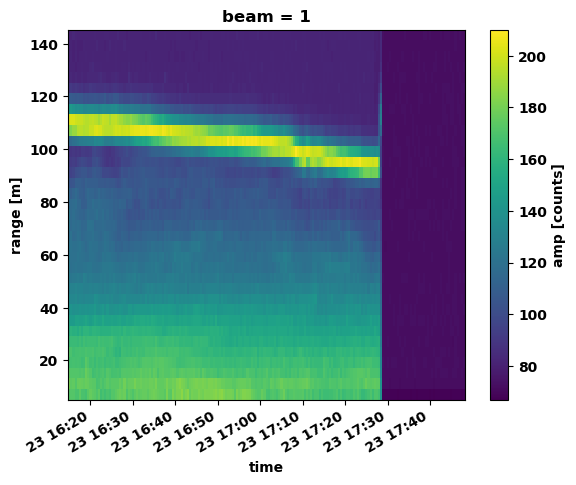

In [5]:
#plot amplitude for beam 0

dat["amp"].isel({"beam":0}).plot()

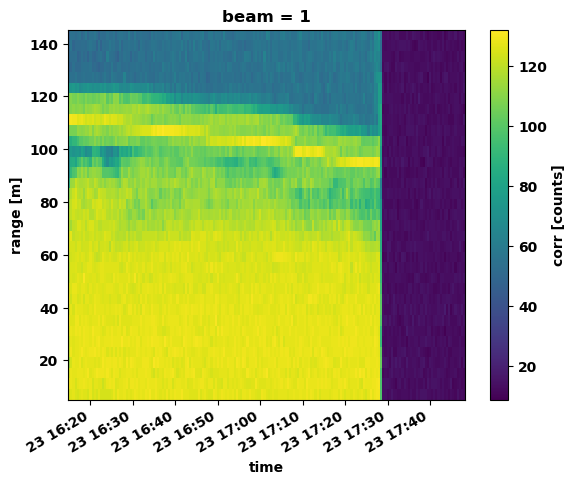

In [6]:
# plot correlation for beam 0
dat["corr"].isel({"beam":0}).plot()

In [8]:
# plot correlation for beam 0
dat["corr"][:][1][:]

<xarray.DataArray 'corr' (range: 35, time: 187)>
array([[124, 126, 127, ...,  12,  13,  12],
       [129, 128, 127, ...,  13,  11,  12],
       [124, 128, 127, ...,  12,  12,  11],
       ...,
       [ 51,  53,  53, ...,  12,  14,  13],
       [ 50,  57,  49, ...,  13,  11,  12],
       [ 47,  55,  54, ...,  14,  14,  12]], dtype=uint8)
Coordinates:
  * time     (time) datetime64[ns] 2022-09-23T16:15:00.029999971 ... 2022-09-...
  * range    (range) float64 7.19 11.19 15.19 19.19 ... 131.2 135.2 139.2 143.2
    beam     int32 1
Attributes:
    units:    counts

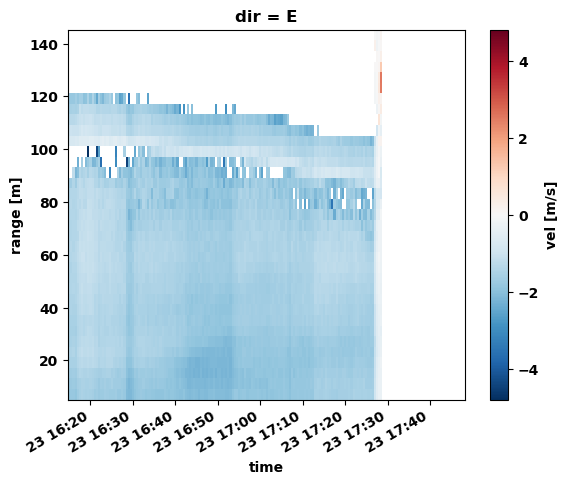

In [30]:
#plot vertical velocity 
dat["vel"].isel({"dir":0}).plot()



In [27]:
# compute velocity norm 
import xarray as xr
import numpy as np

norm_velocity = xr.apply_ufunc(
        np.linalg.norm, dat["vel"], input_core_dims=[["dir"]], kwargs={ "axis": -1}
    )

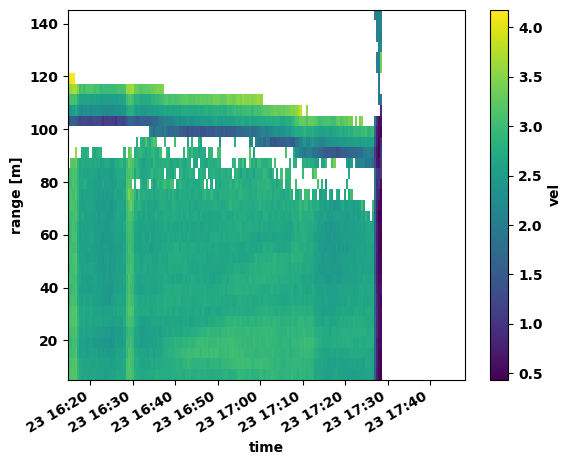

In [28]:
norm_velocity.plot()